# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [23]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [5]:
#  1. Get the total rides for each city type
total_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_ride_count.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [27]:
# 2. Get the total drivers for each city type
sum_drivers_by_type = city_data_df.groupby(["type"]).sum(["driver_count"])
sum_drivers_by_type

,driver_count
type,
Rural,78
Suburban,490
Urban,2405


In [7]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [42]:
#  4. Get the average fare per ride for each city type. 
total_data1_df = pd.merge(total_ride_count, sum_drivers_by_type, how="left", on=["type"])
total_data_type_df = pd.merge(total_data1_df, sum_fares_by_type, how="left", on=["type"])
average_fare_perride = total_data_type_df['fare'] / total_data_type_df['ride_id']
average_fare_perride_df = average_fare_perride.reset_index()
average_fare_perride_df

,type,0
0,Rural,34.623440
1,Suburban,30.970128
2,Urban,24.525772


In [46]:
# 5. Get the average fare per driver for each city type. 
average_fare_perdriver = total_data_type_df['fare'] / total_data_type_df['driver_count']
average_fare_perdriver_df = average_fare_perdriver.reset_index()
average_fare_perdriver_df

,type,0
0,Rural,55.486282
1,Suburban,39.502714
2,Urban,16.571468


In [88]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary1_df = pd.merge(total_data_type_df, average_fare_perride_df, how="left", on=["type","type"])
pyber_summary2_df = pd.merge(pyber_summary1_df, average_fare_perdriver_df, how="left", on=["type","type"])


pyber_summary_df = pyber_summary2_df.set_index('type')
pyber_summary_df.columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [89]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [97]:
#  8. Format the columns.
# pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares']. map('${:,.2f}'. format)
# pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride']. map('${:,.2f}'. format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver']. map('${:,.2f}'. format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [149]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [158]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#Sum_by_date_df = pyber_data_df.groupby(["type","city", "date"]).sum(["fares"])
#Sum_by_date2_df = Sum_by_date_df.groupby(["date"]).sum(["fare"])
#Sum_by_date_df
sum_by_date_df = pyber_data_df.groupby(["type", "date"]).sum()['fare']
sum_by_date_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [161]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
#sum_by_date_df = sum_by_date_df.reset_index()
sum_by_date_df.head()

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33


In [164]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
city_type_fare_pivot = sum_by_date_df.pivot(index="date", columns="type", values='fare')
city_type_fare_pivot.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [169]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
dates_city_df = city_type_fare_pivot.loc['2019-01-01':'2019-04-29']
dates_city_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [171]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
dates_city_df.index = pd.to_datetime(dates_city_df.index)

In [173]:
# 7. Check that the datatype for the index is datetime using df.info()
dates_city_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [179]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
dates_city_week = dates_city_df.resample("W").sum()
dates_city_week.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2019-01-06 to 2019-04-28
Freq: W-SUN
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     17 non-null     float64
 1   Suburban  17 non-null     float64
 2   Urban     17 non-null     float64
dtypes: float64(3)
memory usage: 544.0 bytes


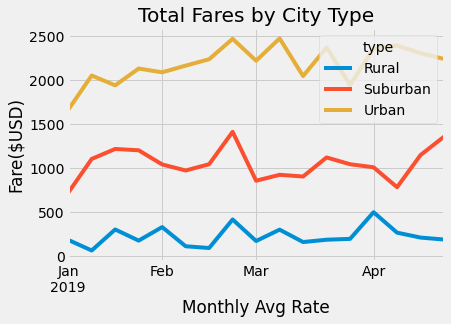

In [188]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
dates_city_week.plot()
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.xlabel('Monthly Avg Rate')
plt.ylabel('Fare($USD)')
plt.title('Total Fares by City Type')
plt.savefig("Analysis/TotalFaresbyCityType.png")
plt.show()